In [1]:
import pandas as pd

## 데이터 불러오기

In [2]:
pd.set_option('display.max_columns',40) # 컬럼 보여지는거 늘리기

In [3]:
cust_data=pd.read_csv('CUST_DATA.csv',encoding='utf-16',engine='python',sep=',')
cust_data.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,47,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,53,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,60,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,64,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,54,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0


In [4]:
# 타이핑의 편의를 위해 컬럼명을 소문자로 변경
cust_data.columns=cust_data.columns.str.lower()

In [5]:
cust_data.columns

Index(['cust_id', 'divided_set', 'siu_cust_yn', 'sex', 'age', 'resi_cost',
       'resi_type_code', 'fp_career', 'cust_rgst', 'ctpr', 'occp_grp_1',
       'occp_grp_2', 'totalprem', 'mincrdt', 'maxcrdt', 'wedd_yn',
       'mate_occp_grp_1', 'mate_occp_grp_2', 'chld_cnt', 'ltbn_chld_age',
       'max_paym_ym', 'max_prm', 'cust_incm', 'rcbase_hshd_incm',
       'jpbase_hshd_incm'],
      dtype='object')

In [6]:
cust_data.shape

(22400, 25)

## 데이터 파악

In [7]:
#  결측치 파악
cust_data.isnull().sum()

cust_id                 0
divided_set             0
siu_cust_yn          1793
sex                     0
age                     0
resi_cost               0
resi_type_code       1254
fp_career               0
cust_rgst             456
ctpr                  621
occp_grp_1            595
occp_grp_2            595
totalprem            5791
mincrdt              9476
maxcrdt              9476
wedd_yn               473
mate_occp_grp_1     11827
mate_occp_grp_2     11827
chld_cnt              473
ltbn_chld_age         473
max_paym_ym          6486
max_prm              6486
cust_incm            5263
rcbase_hshd_incm        0
jpbase_hshd_incm      680
dtype: int64

In [8]:
# 결측치 비율 => 70% 이상이면 삭제
cust_data.isnull().sum()/cust_data.shape[0] * 100

cust_id              0.000000
divided_set          0.000000
siu_cust_yn          8.004464
sex                  0.000000
age                  0.000000
resi_cost            0.000000
resi_type_code       5.598214
fp_career            0.000000
cust_rgst            2.035714
ctpr                 2.772321
occp_grp_1           2.656250
occp_grp_2           2.656250
totalprem           25.852679
mincrdt             42.303571
maxcrdt             42.303571
wedd_yn              2.111607
mate_occp_grp_1     52.799107
mate_occp_grp_2     52.799107
chld_cnt             2.111607
ltbn_chld_age        2.111607
max_paym_ym         28.955357
max_prm             28.955357
cust_incm           23.495536
rcbase_hshd_incm     0.000000
jpbase_hshd_incm     3.035714
dtype: float64

In [9]:
cust_data.info()
# 범주형 데이터: siu_cust_yn,fp_career,ctpr,occp_grp_1,occp_grp_2,wedd_yn,mate_occp_1,2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 25 columns):
cust_id             22400 non-null int64
divided_set         22400 non-null int64
siu_cust_yn         20607 non-null object
sex                 22400 non-null int64
age                 22400 non-null int64
resi_cost           22400 non-null int64
resi_type_code      21146 non-null float64
fp_career           22400 non-null object
cust_rgst           21944 non-null float64
ctpr                21779 non-null object
occp_grp_1          21805 non-null object
occp_grp_2          21805 non-null object
totalprem           16609 non-null float64
mincrdt             12924 non-null float64
maxcrdt             12924 non-null float64
wedd_yn             21927 non-null object
mate_occp_grp_1     10573 non-null object
mate_occp_grp_2     10573 non-null object
chld_cnt            21927 non-null float64
ltbn_chld_age       21927 non-null float64
max_paym_ym         15914 non-null float64
max_pr

In [10]:
# 데이터 기술통계 파악 : 연속형 데이터
cust_data.describe()

,cust_id,divided_set,sex,age,resi_cost,resi_type_code,cust_rgst,totalprem,mincrdt,maxcrdt,chld_cnt,ltbn_chld_age,max_paym_ym,max_prm,cust_incm,rcbase_hshd_incm,jpbase_hshd_incm
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,21146.000000,21944.000000,1.660900e+04,12924.000000,12924.000000,21927.000000,21927.000000,15914.000000,1.591400e+04,17137.000000,22400.000000,21720.000000
mean,11200.500000,1.080045,1.565134,44.734866,15914.413973,25.765251,198924.250638,2.998266e+07,5.838904,19.480656,0.709491,8.603731,200881.825437,4.807763e+05,2704.184863,4768.733884,5198.238950
std,6466.467351,0.271368,0.495750,15.445707,14963.317519,20.691869,16989.329112,4.897438e+07,3.515198,32.363151,0.953671,11.585592,522.266749,1.327265e+06,2188.208641,3072.385280,2714.947843
min,1.000000,1.000000,1.000000,2.000000,0.000000,11.000000,101.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,5600.750000,1.000000,1.000000,34.000000,6732.750000,20.000000,200306.000000,6.665459e+06,6.000000,6.000000,0.000000,0.000000,200404.000000,1.129440e+05,0.000000,2995.000000,3557.750000
50%,11200.500000,1.000000,2.000000,46.000000,12222.000000,20.000000,200306.000000,1.622463e+07,6.000000,6.000000,0.000000,0.000000,200901.000000,2.265920e+05,3432.000000,4807.000000,4681.000000
75%,16800.250000,1.000000,2.000000,56.000000,20988.000000,30.000000,200402.000000,3.479439e+07,6.000000,7.000000,1.000000,19.000000,201402.000000,4.852868e+05,4398.000000,6607.250000,6839.500000
max,22400.000000,2.000000,2.000000,89.000000,305555.000000,99.000000,201602.000000,1.840052e+09,99.000000,99.000000,6.000000,35.000000,207110.000000,5.686262e+07,12687.000000,19829.000000,25872.000000


In [11]:
# 범주형 데이터 파악
cust_data.describe(include='object')

,siu_cust_yn,fp_career,ctpr,occp_grp_1,occp_grp_2,wedd_yn,mate_occp_grp_1,mate_occp_grp_2
count,20607,22400,21779,21805,21805,21927,10573,10573
unique,2,2,17,8,25,2,8,24
top,N,N,경기,8.기타,주부,Y,1.주부,주부
freq,18801,21182,5200,4879,4837,12010,2394,2402


In [12]:
import matplotlib.pyplot as plt

In [13]:
# 사기자와 정상인의 비율 
plot1=cust_data['siu_cust_yn'].value_counts()
plot1.index=['일반인','사기자']

In [14]:
# 한글폰트 지정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

Text(0.5, 1.0, 'siu_cust_yn')

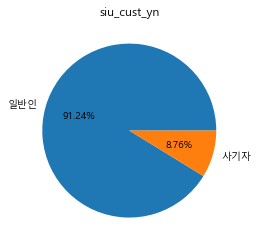

In [15]:
plot1.plot(kind='pie',autopct='%.2f%%')
plt.ylabel('')
plt.title('siu_cust_yn')

In [16]:
# 정상인, 사기자, 분석대상 분포(시각화)
plot2=cust_data['siu_cust_yn'].value_counts(dropna=False)
plot2.index=['일반인','사기자','분석대상']

Text(0.5, 1.0, 'siu_cust_yn(include=NA)')

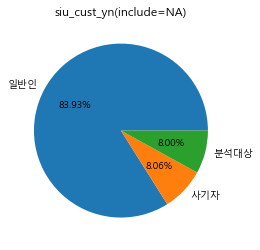

In [17]:
plot2.plot(kind='pie',autopct='%.2f%%')
plt.ylabel('')
plt.title('siu_cust_yn(include=NA)')

# 결측치 처리
- 특정값으로 대체
    - RESI_TYPE_CODE, TOTALPREM
    - MINCRDT, MAXCRDT
    - CTPR

In [18]:
cust_data1=cust_data.copy() # 원본 데이터를 유지시키기 위해 다른 변수에 저장

In [19]:
cust_data1.isnull().sum()

cust_id                 0
divided_set             0
siu_cust_yn          1793
sex                     0
age                     0
resi_cost               0
resi_type_code       1254
fp_career               0
cust_rgst             456
ctpr                  621
occp_grp_1            595
occp_grp_2            595
totalprem            5791
mincrdt              9476
maxcrdt              9476
wedd_yn               473
mate_occp_grp_1     11827
mate_occp_grp_2     11827
chld_cnt              473
ltbn_chld_age         473
max_paym_ym          6486
max_prm              6486
cust_incm            5263
rcbase_hshd_incm        0
jpbase_hshd_incm      680
dtype: int64

In [20]:
# resi_type_code 와 resi_cost의 연관성 => resi_type_code가 결측치면 resi_cost는 0(추정불가)이다
cust_data1[(cust_data1['resi_cost']==0) & (cust_data1['resi_type_code'].isnull())].shape

(1254, 25)

In [21]:
cust_data1[(cust_data1['resi_type_code']==99)& (cust_data1['resi_cost'] == 0)] # 주거 형태가 그 외인 집 중 resi_cost가 0인 집은 없다

,cust_id,divided_set,siu_cust_yn,sex,age,resi_cost,resi_type_code,fp_career,cust_rgst,ctpr,occp_grp_1,occp_grp_2,totalprem,mincrdt,maxcrdt,wedd_yn,mate_occp_grp_1,mate_occp_grp_2,chld_cnt,ltbn_chld_age,max_paym_ym,max_prm,cust_incm,rcbase_hshd_incm,jpbase_hshd_incm


In [22]:
# 따라서 99로 분류하기가 어려우므로 최빈값으로 대체
cust_data1['resi_type_code'].mode()[0]

20.0

In [23]:
cust_data1['resi_type_code'].fillna(cust_data1['resi_type_code'].mode()[0],inplace=True)

In [24]:
cust_data1['resi_type_code'].isnull().sum()

0

In [25]:
# totalprem이 결측인 사람들은 물론 수입이 없는 사람들도 있지만 많인 사람들이 수입이 있기 때문에 중위값으로 대체
cust_data1['totalprem'].fillna(cust_data1['totalprem'].median(),inplace=True)

In [26]:
# maxcrdt과 mincrdt이 모두 결측치인 행 개수 : 9476
cust_data1[cust_data1[['maxcrdt','mincrdt']].isnull().any(axis=1)].shape

(9476, 25)

In [27]:
cust_data1[['maxcrdt','mincrdt']].isnull().sum()

maxcrdt    9476
mincrdt    9476
dtype: int64

In [28]:
# maxcrdt이 결측일 때 mincrdt이 결측이 아닌 경우는 없다.
# 따라서 결측인 사람은 신용등급이 파악 불가능한 상태
cust_data1[(cust_data1['maxcrdt'].isnull()) & (cust_data1['mincrdt'].notnull())]

,cust_id,divided_set,siu_cust_yn,sex,age,resi_cost,resi_type_code,fp_career,cust_rgst,ctpr,occp_grp_1,occp_grp_2,totalprem,mincrdt,maxcrdt,wedd_yn,mate_occp_grp_1,mate_occp_grp_2,chld_cnt,ltbn_chld_age,max_paym_ym,max_prm,cust_incm,rcbase_hshd_incm,jpbase_hshd_incm


In [29]:
# mincrdt에는 최소값으로 결측치 대체
# maxcrdt에는 최대값으로 결측치 대체
cust_data1['mincrdt'].fillna(cust_data1['mincrdt'].min(),inplace=True)
cust_data1['maxcrdt'].fillna(cust_data1['maxcrdt'].max(),inplace=True)

In [30]:
# 거주자들의 최빈값으로 대체
cust_data1['ctpr'].fillna(cust_data1['ctpr'].mode()[0],inplace=True)

In [31]:
cust_data1['ctpr'].mode()[0]

'경기'

In [32]:
cust_data1.isnull().sum()

cust_id                 0
divided_set             0
siu_cust_yn          1793
sex                     0
age                     0
resi_cost               0
resi_type_code          0
fp_career               0
cust_rgst             456
ctpr                    0
occp_grp_1            595
occp_grp_2            595
totalprem               0
mincrdt                 0
maxcrdt                 0
wedd_yn               473
mate_occp_grp_1     11827
mate_occp_grp_2     11827
chld_cnt              473
ltbn_chld_age         473
max_paym_ym          6486
max_prm              6486
cust_incm            5263
rcbase_hshd_incm        0
jpbase_hshd_incm      680
dtype: int64

# 결측치 처리
- 다른 변수들을 고려하여 대체
    - WEDD_YN : 결혼여부
        - 관련 변수 : CHLD_CNT, LTBN_CHLD_AGE, MATE_OCCP_GRP_1
        - WEDD_YN의 결측 => N
        - WEDD_YN이 결측인 CHLD_CNT, LTBN_CHLD_AGE => 0
            - WEDD_YN == N : 0

In [33]:
cust_data1[['chld_cnt','ltbn_chld_age','mate_occp_grp_1']].isnull().sum()

chld_cnt             473
ltbn_chld_age        473
mate_occp_grp_1    11827
dtype: int64

In [34]:
# 결혼여부가 결측인 사람들의 chld_cnt,ltbn_chld_age,mate_occp_grp1 확인
tmp=cust_data1[cust_data1['wedd_yn'].isnull()][['chld_cnt','ltbn_chld_age','mate_occp_grp_1']]

In [35]:
tmp.isnull().sum()

chld_cnt           473
ltbn_chld_age      473
mate_occp_grp_1    473
dtype: int64

In [36]:
tmp.shape # 결혼 여부가 결측인 사람들에 대해 아이수,막내아이나이,자녀직업은 모두 결측값

(473, 3)

In [37]:
# 결혼여부가 결측이 아닌 사람들의 chld_cnt,ltbn_chld_age,mate_occp_grp1 확인
tmp2=cust_data1[cust_data1['wedd_yn'].notnull()][['wedd_yn','chld_cnt','ltbn_chld_age','mate_occp_grp_1']]

In [38]:
tmp2['wedd_yn'].value_counts()

Y    12010
N     9917
Name: wedd_yn, dtype: int64

In [39]:
# mate_occp_grp1의 결측값 9917은 미혼자 결측 데이터로 처리
tmp2[tmp2['wedd_yn']=='N'].isnull().sum()

wedd_yn               0
chld_cnt              0
ltbn_chld_age         0
mate_occp_grp_1    9917
dtype: int64

In [40]:
# 결혼 데이터가 결측인 사람들은 미혼으로 처리
# chld_cnt , ltbn_chld_age  = 0
x1=cust_data1[cust_data1['wedd_yn'].isnull()]['chld_cnt'].index
x2=cust_data1[cust_data1['wedd_yn'].isnull()]['ltbn_chld_age'].index

In [41]:
cust_data1['chld_cnt'][x1] = 0
cust_data1['ltbn_chld_age'][x2]=0

C:\Users\winst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\winst\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
cust_data1['wedd_yn'].fillna('N',inplace=True)

In [43]:
cust_data1.isnull().sum()

cust_id                 0
divided_set             0
siu_cust_yn          1793
sex                     0
age                     0
resi_cost               0
resi_type_code          0
fp_career               0
cust_rgst             456
ctpr                    0
occp_grp_1            595
occp_grp_2            595
totalprem               0
mincrdt                 0
maxcrdt                 0
wedd_yn                 0
mate_occp_grp_1     11827
mate_occp_grp_2     11827
chld_cnt                0
ltbn_chld_age           0
max_paym_ym          6486
max_prm              6486
cust_incm            5263
rcbase_hshd_incm        0
jpbase_hshd_incm      680
dtype: int64

# 결측치 처리
- 다른 변수들을 고려하여 대체
    - cust_incm의 결측치
        - occp_grp_1을 이용해 직업별 평균 수입으로 대체
        - occp_grp_1과 cust_incm 결측인 경우 백수일 가능성 고려
            - 9.무직
            - 수입:0

In [44]:
cust_data1['occp_grp_1'].unique()

array(['3.사무직', '5.서비스', '2.자영업', '4.전문직', '6.제조업', '1.주부', '8.기타',
       '7.1차산업', nan], dtype=object)

In [45]:
# 주부의 수입은 얼마인지 확인
cust_data1[cust_data1['occp_grp_1']=='1.주부']['cust_incm'].describe()

count    3815.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: cust_incm, dtype: float64

In [46]:
# 주부의 수입이 모두 0이므로 수입과 직업이 결측인 데이터는 주부로 대체
# 무직이라는 변수를 늘리는 것보다 기존의 변수로 대체하는 것이 훨씬 효율적
x=cust_data1[cust_data1[['occp_grp_1','cust_incm']].isnull().all(axis=1)].index

In [47]:
cust_data1['occp_grp_1'][x]='1.주부'

C:\Users\winst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
cust_data1['cust_incm'][x]=0

C:\Users\winst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
# 직업별 평균으로 수입 결측치 대체
cust_data1['cust_incm'].fillna(cust_data1.groupby('occp_grp_1')['cust_incm'].transform('mean'),inplace=True)

In [50]:
cust_data1['cust_incm'].isnull().sum()

0

# 모델링으로 결측치 대체

- OCCP_GRP_1 : 직업코드
    - 알고리즘 : RandomForest, xgboost 중 하나
    - 입력변수 : FP_CAREER, TOTALPREM, CUST_INCM

In [51]:
cust_data1['fp_career'].value_counts()

N    21182
Y     1218
Name: fp_career, dtype: int64

In [52]:
cust_data1['fp_career'].isnull().sum()

0

In [53]:
tmp=cust_data1[['fp_career','totalprem','cust_incm','occp_grp_1']].copy()

In [54]:
# fp_carrer가 범주형 변수이므로 onehotencoding 필요
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()


In [55]:
tmp['fp_career'].values

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [56]:
fp_ohe=ohe.fit_transform(tmp['fp_career'].values.reshape(-1,1)).toarray()

In [57]:
fp_ohe_df=pd.DataFrame(fp_ohe,columns=['f1','f2'])

In [58]:
tmp.drop('fp_career',axis=1,inplace=True)

In [59]:
tmp=pd.concat([tmp,fp_ohe_df],axis=1)

In [60]:
tmp.head()

,totalprem,cust_incm,occp_grp_1,f1,f2
0,146980441.0,4879.000000,3.사무직,1.0,0.0
1,94600109.0,6509.000000,3.사무직,1.0,0.0
2,18501269.0,4180.000000,5.서비스,1.0,0.0
3,317223657.0,4621.081266,2.자영업,0.0,1.0
4,10506072.0,3894.000000,2.자영업,0.0,1.0


In [61]:
tmp['occp_grp_1'].unique()

array(['3.사무직', '5.서비스', '2.자영업', '4.전문직', '6.제조업', '1.주부', '8.기타',
       '7.1차산업', nan], dtype=object)

In [62]:
test=tmp[tmp['occp_grp_1'].isnull()][['f1','f2','totalprem','cust_incm','occp_grp_1']].copy()
train=tmp[tmp['occp_grp_1'].notnull()][['f1','f2','totalprem','cust_incm','occp_grp_1']].copy()

In [63]:
train_x=train[['f1','f2','totalprem','cust_incm']]
train_y=train['occp_grp_1']
test_x=test[['f1','f2','totalprem','cust_incm']]
test_y=test['occp_grp_1']

In [64]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rf=RandomForestClassifier()
xgb=XGBClassifier()

In [65]:
rf.fit(train_x,train_y)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
pred_y=rf.predict(test_x)

In [67]:
rf.score(test_x,pred_y)

1.0

In [68]:
nan_idx=test.index

In [69]:
cust_data1['occp_grp_1'][nan_idx] = pred_y

C:\Users\winst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
cust_data1['occp_grp_1'].isnull().sum()

0

# 유도변수 생성
- age => age_range(~19,~39,~59,~100)('미성년자','청년','중년','장년')
- chld_cnt => chld_range

In [71]:
cust_data1.isnull().sum()

cust_id                 0
divided_set             0
siu_cust_yn          1793
sex                     0
age                     0
resi_cost               0
resi_type_code          0
fp_career               0
cust_rgst             456
ctpr                    0
occp_grp_1              0
occp_grp_2            595
totalprem               0
mincrdt                 0
maxcrdt                 0
wedd_yn                 0
mate_occp_grp_1     11827
mate_occp_grp_2     11827
chld_cnt                0
ltbn_chld_age           0
max_paym_ym          6486
max_prm              6486
cust_incm               0
rcbase_hshd_incm        0
jpbase_hshd_incm      680
dtype: int64

In [72]:
# 최소 연령 = 2 , 최대 연령 = 89
cust_data1['age'].describe()

count    22400.000000
mean        44.734866
std         15.445707
min          2.000000
25%         34.000000
50%         46.000000
75%         56.000000
max         89.000000
Name: age, dtype: float64

In [73]:
cust_data1['age_range']=pd.cut(cust_data1['age'],[0,19,39,59,100],labels=['미성년자','청년','중년','장년'])

In [74]:
cust_data1[['age','age_range']].head()

,age,age_range
0,47,중년
1,53,중년
2,60,장년
3,64,장년
4,54,중년


In [75]:
cust_data1['chld_cnt'].describe()

count    22400.000000
mean         0.694509
std          0.949046
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: chld_cnt, dtype: float64

In [76]:
# 0 : no , 1~3 : small ,4~ : big
cust_data1['chld_range']=pd.cut(cust_data1['chld_cnt'],[0,1,4,7],labels=['no','small','big'],right=False)

In [77]:
cust_data1[['chld_cnt','chld_range']].head()

,chld_cnt,chld_range
0,2.0,small
1,2.0,small
2,0.0,no
3,0.0,no
4,3.0,small


In [78]:
cust_data1.columns

Index(['cust_id', 'divided_set', 'siu_cust_yn', 'sex', 'age', 'resi_cost',
       'resi_type_code', 'fp_career', 'cust_rgst', 'ctpr', 'occp_grp_1',
       'occp_grp_2', 'totalprem', 'mincrdt', 'maxcrdt', 'wedd_yn',
       'mate_occp_grp_1', 'mate_occp_grp_2', 'chld_cnt', 'ltbn_chld_age',
       'max_paym_ym', 'max_prm', 'cust_incm', 'rcbase_hshd_incm',
       'jpbase_hshd_incm', 'age_range', 'chld_range'],
      dtype='object')

# 파생변수
-  파생변수 추가
- CLAIM_DATA 
    - 사기자에 영향을 주는 요인 
        - 평균 입원 일수 : VLID_HOSP_OTDA(통원일/입원일)
        - 사고구분 및 청구사유 횟수 : ACCI_DVSN, DMND_RESN_CODE
    - 원본 데이터(cust_data)에 합치는 방법 : CUST_ID

In [79]:
claim_data=pd.read_csv('CLAIM_DATA.csv',encoding='utf-16',engine='python')

In [80]:
claim_data.columns

Index(['CUST_ID', 'POLY_NO', 'ACCI_OCCP_GRP1', 'ACCI_OCCP_GRP2', 'CHANG_FP_YN',
       'CNTT_RECP_SQNO', 'RECP_DATE', 'ORIG_RESN_DATE', 'RESN_DATE',
       'CRNT_PROG_DVSN', 'ACCI_DVSN', 'CAUS_CODE', 'CAUS_CODE_DTAL',
       'DSAS_NAME', 'DMND_RESN_CODE', 'DMND_RSCD_SQNO', 'HOSP_OTPA_STDT',
       'HOSP_OTPA_ENDT', 'RESL_CD1', 'RESL_NM1', 'VLID_HOSP_OTDA',
       'HOUSE_HOSP_DIST', 'HOSP_CODE', 'ACCI_HOSP_ADDR', 'HOSP_SPEC_DVSN',
       'CHME_LICE_NO', 'PAYM_DATE', 'DMND_AMT', 'PAYM_AMT', 'PMMI_DLNG_YN',
       'SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 'DSCT_AMT',
       'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA', 'NON_PAY_RATIO', 'HEED_HOSP_YN'],
      dtype='object')

In [81]:
claim_data.isnull().sum()

CUST_ID                 0
POLY_NO                 0
ACCI_OCCP_GRP1       1417
ACCI_OCCP_GRP2       1417
CHANG_FP_YN             0
CNTT_RECP_SQNO          0
RECP_DATE               0
ORIG_RESN_DATE          0
RESN_DATE               0
CRNT_PROG_DVSN          0
ACCI_DVSN               0
CAUS_CODE               0
CAUS_CODE_DTAL          0
DSAS_NAME               0
DMND_RESN_CODE          0
DMND_RSCD_SQNO          0
HOSP_OTPA_STDT      32571
HOSP_OTPA_ENDT      32571
RESL_CD1                0
RESL_NM1                0
VLID_HOSP_OTDA          0
HOUSE_HOSP_DIST     17048
HOSP_CODE               9
ACCI_HOSP_ADDR      10070
HOSP_SPEC_DVSN          9
CHME_LICE_NO            0
PAYM_DATE              13
DMND_AMT                0
PAYM_AMT                0
PMMI_DLNG_YN            0
SELF_CHAM          100053
NON_PAY            100053
TAMT_SFCA          100053
PATT_CHRG_TOTA     100053
DSCT_AMT           100053
COUNT_TRMT_ITEM    100053
DCAF_CMPS_XCPA     110963
NON_PAY_RATIO           0
HEED_HOSP_YN

In [82]:
claim_data.columns=claim_data.columns.str.lower()

In [83]:
claim_data[['cust_id','vlid_hosp_otda']].head(10)

,cust_id,vlid_hosp_otda
0,5936,2
1,5936,2
2,5936,2
3,1043,6
4,8545,0
5,4734,4
6,9416,0
7,20267,23
8,2778,29
9,9019,13


In [84]:
# 평균 입원 일수 => VLID_HOSP_OTDA를 이용
mean_days=claim_data.pivot_table(index='cust_id',values='vlid_hosp_otda',aggfunc='mean')

In [85]:
mean_days.head()

,vlid_hosp_otda
cust_id,
1,1.250000
2,2.666667
3,16.000000
4,0.000000
5,25.000000


In [86]:
mean_days=mean_days.reset_index()

In [87]:
cust_data1=cust_data1.merge(mean_days).copy()

In [88]:
cust_data1.rename({'vlid_hosp_otda':'mean_days'},axis=1,inplace=True)

In [89]:
cust_data1[['cust_id','mean_days']].head()

,cust_id,mean_days
0,1,1.250000
1,2,2.666667
2,3,16.000000
3,4,0.000000
4,5,25.000000


In [90]:
cust_data1.columns

Index(['cust_id', 'divided_set', 'siu_cust_yn', 'sex', 'age', 'resi_cost',
       'resi_type_code', 'fp_career', 'cust_rgst', 'ctpr', 'occp_grp_1',
       'occp_grp_2', 'totalprem', 'mincrdt', 'maxcrdt', 'wedd_yn',
       'mate_occp_grp_1', 'mate_occp_grp_2', 'chld_cnt', 'ltbn_chld_age',
       'max_paym_ym', 'max_prm', 'cust_incm', 'rcbase_hshd_incm',
       'jpbase_hshd_incm', 'age_range', 'chld_range', 'mean_days'],
      dtype='object')

In [91]:
# 사고구분 및 청구사유 횟수 : ACCI_DVSN, DMND_RESN_CODE
claim_data['acci_dvsn'].unique() 

array([1, 3, 2], dtype=int64)

In [92]:
claim_data['dmnd_resn_code'].unique()

array([3, 2, 5, 6, 4, 1, 7, 9], dtype=int64)

In [93]:
claim_data[['acci_dvsn','dmnd_resn_code']].head()

,acci_dvsn,dmnd_resn_code
0,1,3
1,1,3
2,1,3
3,3,2
4,3,5


In [94]:
# 1_1, 1_2 형태로 컬럼을 만들어 저장
tmp=claim_data[['cust_id','acci_dvsn','dmnd_resn_code']]

In [95]:
tmp.head()

,cust_id,acci_dvsn,dmnd_resn_code
0,5936,1,3
1,5936,1,3
2,5936,1,3
3,1043,3,2
4,8545,3,5


In [96]:
tmp.T.values

array([[ 5936,  5936,  5936, ...,  6864, 15545, 21542],
       [    1,     1,     1, ...,     3,     3,     3],
       [    3,     3,     3, ...,     2,     3,     2]], dtype=int64)

In [97]:
pd.MultiIndex.from_product([[0,1,2],['A','B'], [1,2,3]])

MultiIndex(levels=[[0, 1, 2], ['A', 'B'], [1, 2, 3]],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [98]:
multi = pd.MultiIndex.from_product(list(map(set, tmp.values.T)))

In [99]:
cross_table=claim_data.groupby(['cust_id','acci_dvsn','dmnd_resn_code']).size()

In [100]:
cross_table2=cross_table.reindex(multi,fill_value=0)

In [101]:
cross_table3=cross_table2.unstack([1,2])

In [102]:
cols=[]
for x,y in cross_table3.columns:
    cols.append('{}_{}'.format(x,y))
cols

['1_1',
 '1_2',
 '1_3',
 '1_4',
 '1_5',
 '1_6',
 '1_7',
 '1_9',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '2_5',
 '2_6',
 '2_7',
 '2_9',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6',
 '3_7',
 '3_9']

In [103]:
cross_table3.columns=cols

In [104]:
cross_table3.head()

,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,2_7,2_9,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
cross_table3=cross_table3.reset_index()

In [106]:
cross_table3.rename({'index':'cust_id'},axis=1,inplace=True)

In [107]:
cust_data1=cust_data1.merge(cross_table3)

In [108]:
cust_data1.columns

Index(['cust_id', 'divided_set', 'siu_cust_yn', 'sex', 'age', 'resi_cost',
       'resi_type_code', 'fp_career', 'cust_rgst', 'ctpr', 'occp_grp_1',
       'occp_grp_2', 'totalprem', 'mincrdt', 'maxcrdt', 'wedd_yn',
       'mate_occp_grp_1', 'mate_occp_grp_2', 'chld_cnt', 'ltbn_chld_age',
       'max_paym_ym', 'max_prm', 'cust_incm', 'rcbase_hshd_incm',
       'jpbase_hshd_incm', 'age_range', 'chld_range', 'mean_days', '1_1',
       '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_9', '2_1', '2_2', '2_3',
       '2_4', '2_5', '2_6', '2_7', '2_9', '3_1', '3_2', '3_3', '3_4', '3_5',
       '3_6', '3_7', '3_9'],
      dtype='object')

# 범주형 변수 데이터 탐색


In [109]:
# 사기자 VS 일반인 사이의 분포 차이 비교를 위한 탐색

In [110]:
fraud_age=cust_data1[cust_data1['siu_cust_yn']=='Y']['age_range']

Text(0.5, 1.0, '사기자 나이')

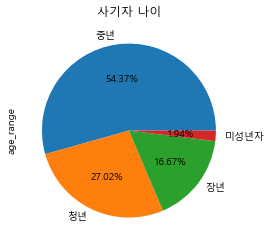

In [111]:
# 사기자 나이 분포
fraud_age.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('사기자 나이')

In [112]:
general_age=cust_data1[cust_data1['siu_cust_yn']=='N']['age_range']

Text(0.5, 1.0, '일반인 나이')

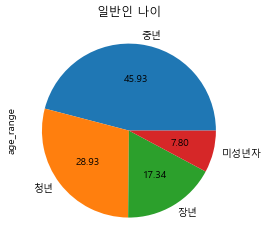

In [113]:
# 일반인 나이 분포
general_age.value_counts().plot(kind='pie',autopct='%.2f')
plt.title('일반인 나이')

In [114]:
# sex 에 대한 차이 1: man  2: woman 
fraud_sex= cust_data1[cust_data1['siu_cust_yn']=='N']['sex']

Text(0.5, 1.0, '일반인 성별')

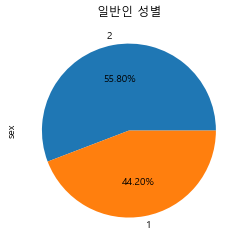

In [115]:
fraud_sex.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('일반인 성별')

In [116]:
general_sex=cust_data1[cust_data1['siu_cust_yn']=='Y']['sex']

Text(0.5, 1.0, '사기자 성별')

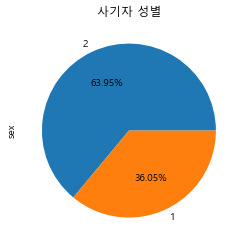

In [117]:
general_sex.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('사기자 성별')

- 사기자의 나이 분포:
    - 중년 나이대가 일반인 보다 사기자가 비율이 좀 더 높다
- 사기자 성별 분포:
    - 여자가 일반인보다 사기자 비율이 좀 더 높다

# 데이터 삭제

In [118]:
cust_data1.shape

(22400, 52)

In [119]:
cust_data1.columns

Index(['cust_id', 'divided_set', 'siu_cust_yn', 'sex', 'age', 'resi_cost',
       'resi_type_code', 'fp_career', 'cust_rgst', 'ctpr', 'occp_grp_1',
       'occp_grp_2', 'totalprem', 'mincrdt', 'maxcrdt', 'wedd_yn',
       'mate_occp_grp_1', 'mate_occp_grp_2', 'chld_cnt', 'ltbn_chld_age',
       'max_paym_ym', 'max_prm', 'cust_incm', 'rcbase_hshd_incm',
       'jpbase_hshd_incm', 'age_range', 'chld_range', 'mean_days', '1_1',
       '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_9', '2_1', '2_2', '2_3',
       '2_4', '2_5', '2_6', '2_7', '2_9', '3_1', '3_2', '3_3', '3_4', '3_5',
       '3_6', '3_7', '3_9'],
      dtype='object')

In [120]:
cust_data1.isnull().sum()

cust_id                 0
divided_set             0
siu_cust_yn          1793
sex                     0
age                     0
resi_cost               0
resi_type_code          0
fp_career               0
cust_rgst             456
ctpr                    0
occp_grp_1              0
occp_grp_2            595
totalprem               0
mincrdt                 0
maxcrdt                 0
wedd_yn                 0
mate_occp_grp_1     11827
mate_occp_grp_2     11827
chld_cnt                0
ltbn_chld_age           0
max_paym_ym          6486
max_prm              6486
cust_incm               0
rcbase_hshd_incm        0
jpbase_hshd_incm      680
age_range               0
chld_range              0
mean_days               0
1_1                     0
1_2                     0
1_3                     0
1_4                     0
1_5                     0
1_6                     0
1_7                     0
1_9                     0
2_1                     0
2_2                     0
2_3         

In [121]:
# 삭제를 잘못했을때를 대비하여 final_data에 복사 후 사용
final_data=cust_data1.copy()

In [122]:
# occp_grp_2 , mate_occp_grp2 => 세부 분류 한 것이므로 대체 값 존재
final_data.drop(['occp_grp_2','mate_occp_grp_2'],axis=1,inplace=True)

In [123]:
# age -> age_range 가 있으므로 삭제
final_data.drop('age',axis=1,inplace=True)

In [124]:
# 분산이 0인 컬럼 삭제 => 2_7,2_9
final_data.describe().loc['std']==0

cust_id             False
divided_set         False
sex                 False
resi_cost           False
resi_type_code      False
cust_rgst           False
totalprem           False
mincrdt             False
maxcrdt             False
chld_cnt            False
ltbn_chld_age       False
max_paym_ym         False
max_prm             False
cust_incm           False
rcbase_hshd_incm    False
jpbase_hshd_incm    False
mean_days           False
1_1                 False
1_2                 False
1_3                 False
1_4                 False
1_5                 False
1_6                 False
1_7                 False
1_9                 False
2_1                 False
2_2                 False
2_3                 False
2_4                 False
2_5                 False
2_6                 False
2_7                  True
2_9                  True
3_1                 False
3_2                 False
3_3                 False
3_4                 False
3_5                 False
3_6         

In [125]:
final_data.drop(['2_7','2_9'],axis=1,inplace=True)

In [126]:
final_data.isnull().sum()

cust_id                 0
divided_set             0
siu_cust_yn          1793
sex                     0
resi_cost               0
resi_type_code          0
fp_career               0
cust_rgst             456
ctpr                    0
occp_grp_1              0
totalprem               0
mincrdt                 0
maxcrdt                 0
wedd_yn                 0
mate_occp_grp_1     11827
chld_cnt                0
ltbn_chld_age           0
max_paym_ym          6486
max_prm              6486
cust_incm               0
rcbase_hshd_incm        0
jpbase_hshd_incm      680
age_range               0
chld_range              0
mean_days               0
1_1                     0
1_2                     0
1_3                     0
1_4                     0
1_5                     0
1_6                     0
1_7                     0
1_9                     0
2_1                     0
2_2                     0
2_3                     0
2_4                     0
2_5                     0
2_6         

In [127]:
# max_prm 유의미하지 않다고 판단
# max_paym_ym은 연도를 가르키기 때문에 삭제 필요
# 고객 등록연월도 같은 이유로 삭제
# 추정가구 소득 jpbase_hshd_incm은 rcbase와 기준만 다른 것이므로 삭제
# chld_cnt는 chld_range로 대체하여 삭제
# mate_occp_grp_1 유의미하지 않은 데이터
# ctpr 지역과 상관 x

In [128]:
final_data.drop(['max_paym_ym','max_prm','cust_rgst','jpbase_hshd_incm','chld_cnt','mate_occp_grp_1','ctpr'],axis=1,inplace=True)

In [129]:
final_data.columns

Index(['cust_id', 'divided_set', 'siu_cust_yn', 'sex', 'resi_cost',
       'resi_type_code', 'fp_career', 'occp_grp_1', 'totalprem', 'mincrdt',
       'maxcrdt', 'wedd_yn', 'ltbn_chld_age', 'cust_incm', 'rcbase_hshd_incm',
       'age_range', 'chld_range', 'mean_days', '1_1', '1_2', '1_3', '1_4',
       '1_5', '1_6', '1_7', '1_9', '2_1', '2_2', '2_3', '2_4', '2_5', '2_6',
       '3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_9'],
      dtype='object')

In [130]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 0 to 22399
Data columns (total 40 columns):
cust_id             22400 non-null int64
divided_set         22400 non-null int64
siu_cust_yn         20607 non-null object
sex                 22400 non-null int64
resi_cost           22400 non-null int64
resi_type_code      22400 non-null float64
fp_career           22400 non-null object
occp_grp_1          22400 non-null object
totalprem           22400 non-null float64
mincrdt             22400 non-null float64
maxcrdt             22400 non-null float64
wedd_yn             22400 non-null object
ltbn_chld_age       22400 non-null float64
cust_incm           22400 non-null float64
rcbase_hshd_incm    22400 non-null int64
age_range           22400 non-null category
chld_range          22400 non-null category
mean_days           22400 non-null float64
1_1                 22400 non-null int64
1_2                 22400 non-null int64
1_3                 22400 non-null int64
1_4   

In [131]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
def ohe_trans(df, col):
    ohe = OneHotEncoder()
    x = ohe.fit_transform(df[col].values.reshape(-1,1)).toarray()
    tmp = []
    for i in range(df[col].unique().size):
        tmp.append(col[0]+str(i))
        
    ohe_df = pd.DataFrame(x, columns=tmp)
    return ohe_df

In [133]:
final_data['age_range']=final_data['age_range'].astype('object')
final_data['chld_range']=final_data['chld_range'].astype('object')

In [134]:
final_data[['age_range','chld_range']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 0 to 22399
Data columns (total 2 columns):
age_range     22400 non-null object
chld_range    22400 non-null object
dtypes: object(2)
memory usage: 525.0+ KB


In [135]:
# sex, age_range, fp_career , wedd_yn , chld_range
sex_df = ohe_trans(final_data, 'sex')
age_df = ohe_trans(final_data, 'age_range')
fp_df = ohe_trans(final_data, 'fp_career')
wedd_df = ohe_trans(final_data, 'wedd_yn')
chld_df = ohe_trans(final_data, 'chld_range')

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [136]:
# occp_grp_1
occp_df=ohe_trans(final_data,'occp_grp_1')

In [137]:
tmp=pd.concat([final_data,sex_df,age_df,fp_df,wedd_df,chld_df,occp_df],axis=1)

In [138]:
tmp.drop(['sex','age_range','fp_career','wedd_yn','chld_range','occp_grp_1'],axis=1,inplace=True)

# 학습데이터, 테스트 데이터 분리
- 학습데이터 : divided = 1
- 테스트데이터 : divided =2

In [139]:
train=tmp[tmp['divided_set']==1]
test=tmp[tmp['divided_set']==2]

In [140]:
train_x=train.loc[:,train.columns.difference(['cust_id','siu_cust_yn','divided_set'])]
train_y=train['siu_cust_yn']

In [141]:
test_x=test.loc[:,test.columns.difference(['cust_id','siu_cust_yn','divided_set'])]
test_y=test['siu_cust_yn']

In [142]:
# 랜덤포레스트 , xgboost , stacking, extratreeclassifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


In [144]:
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
xgb=XGBClassifier()

In [145]:
rf.fit(train_x,train_y)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [146]:
et.fit(train_x,train_y)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [147]:
xgb.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [148]:
rf.parms={'max_depth':[None,5,10],'criterion':['gini','entropy'],'max_features':[None,'sqrt','log2']}

In [149]:
et.parms={'max_depth':[None,5,10],'criterion':['gini','entropy'],'max_features':[None,'sqrt','log2']}

In [150]:
xgb.parms={'max_depth':[3,5,10],'gamma':[0,0.5,1],'max_features':['auto','log','log2'],'eta':[0.05,0.1,0.3]}

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
rf_cv=GridSearchCV(rf,rf.parms)
et_cv=GridSearchCV(et,et.parms)
xgb_cv=GridSearchCV(xgb,xgb.parms)

In [153]:
rf_cv.fit(train_x,train_y)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy'], 'max_features': [None, 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
rf_cv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None}

In [155]:
et_cv.fit(train_x,train_y)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy'], 'max_features': [None, 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [156]:
et_cv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None}

In [157]:
xgb_cv.fit(train_x,train_y)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 10], 'gamma': [0, 0.5, 1], 'max_features': ['auto', 'log', 'log2'], 'eta': [0.05, 0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [158]:
xgb_cv.best_params_

{'eta': 0.05, 'gamma': 1, 'max_depth': 5, 'max_features': 'auto'}

In [159]:
# 정답 데이터 적재
answer=pd.read_csv('answer.csv')
answer.head()

,CUST_ID,SIU_CUST_YN
0,37,0
1,51,0
2,60,0
3,65,0
4,73,0


In [160]:
answer.columns=answer.columns.str.lower()

In [161]:
pred_rf_cv=rf_cv.predict(test_x)

In [162]:
answer['pred_rf_cv']=pred_rf_cv

In [163]:
pred_et_cv=et_cv.predict(test_x)

In [164]:
answer['pred_et_cv']=pred_et_cv

In [165]:
pred_xgb_cv=xgb_cv.predict(test_x)

In [166]:
answer['pred_xgb_cv']=pred_xgb_cv

In [167]:
pred_rf=rf.predict(test_x)
answer['pred_rf']=pred_rf
pred_et=et.predict(test_x)
answer['pred_et']=pred_et
pred_xgb=xgb.predict(test_x)
answer['pred_xgb']=pred_xgb

In [168]:
answer.head()

,cust_id,siu_cust_yn,pred_rf_cv,pred_et_cv,pred_xgb_cv,pred_rf,pred_et,pred_xgb
0,37,0,N,N,N,N,N,N
1,51,0,N,N,N,N,N,N
2,60,0,N,N,N,N,N,N
3,65,0,N,N,N,N,N,N
4,73,0,N,N,N,N,N,N


In [169]:
answer['siu_cust_yn']=answer['siu_cust_yn'].map({0:'N',1:'Y'})

In [170]:
answer.head()

,cust_id,siu_cust_yn,pred_rf_cv,pred_et_cv,pred_xgb_cv,pred_rf,pred_et,pred_xgb
0,37,N,N,N,N,N,N,N
1,51,N,N,N,N,N,N,N
2,60,N,N,N,N,N,N,N
3,65,N,N,N,N,N,N,N
4,73,N,N,N,N,N,N,N


In [171]:
# r2_score
models=[rf_cv,et_cv,xgb_cv,rf,et,xgb]
tmp={}
for m,k in zip(models,['rf_cv','et_cv','xgb_cv','rf','et','xgb']):
    s=m.score(test_x,answer['siu_cust_yn'])
    tmp[k]=s
tmp

{'rf_cv': 0.8778583379810374,
 'et_cv': 0.8834355828220859,
 'xgb_cv': 0.8722810931399888,
 'rf': 0.8823201338538762,
 'et': 0.8906860011154489,
 'xgb': 0.8739542665923034}

Text(0.5, 1.0, '모델별 r2_score')

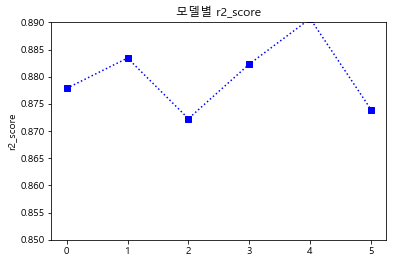

In [172]:
plt.plot(tmp.values(),'bs:')
plt.rcParams["figure.figsize"] = (10,5)
plt.ylim(0.85,0.89)
plt.ylabel('r2_score')
plt.title('모델별 r2_score')

In [173]:
from sklearn.metrics import f1_score

In [174]:
# f1_score는 int,float만 지원
answer['siu_cust_yn']=answer['siu_cust_yn'].map({'N':0,'Y':1})
answer['pred_rf_cv']=answer['pred_rf_cv'].map({'N':0,'Y':1})
answer['pred_et_cv']=answer['pred_et_cv'].map({'N':0,'Y':1})
answer['pred_xgb_cv']=answer['pred_xgb_cv'].map({'N':0,'Y':1})
answer['pred_rf']=answer['pred_rf'].map({'N':0,'Y':1})
answer['pred_et']=answer['pred_et'].map({'N':0,'Y':1})
answer['pred_xgb']=answer['pred_xgb'].map({'N':0,'Y':1})

In [175]:
answer.head()

,cust_id,siu_cust_yn,pred_rf_cv,pred_et_cv,pred_xgb_cv,pred_rf,pred_et,pred_xgb
0,37,0,0,0,0,0,0,0
1,51,0,0,0,0,0,0,0
2,60,0,0,0,0,0,0,0
3,65,0,0,0,0,0,0,0
4,73,0,0,0,0,0,0,0


In [176]:
# f1_score
models=[rf_cv,et_cv,xgb_cv,rf,et,xgb]
tmp2={}
for m,k in zip(models,['pred_rf_cv','pred_et_cv','pred_xgb_cv','pred_rf','pred_et','pred_xgb']):
    s=f1_score(answer['siu_cust_yn'],answer[k])
    tmp2[k]=s
tmp2

{'pred_rf_cv': 0.051948051948051945,
 'pred_et_cv': 0.054298642533936646,
 'pred_xgb_cv': 0.05761316872427984,
 'pred_rf': 0.06222222222222223,
 'pred_et': 0.0392156862745098,
 'pred_xgb': 0.05042016806722689}

Text(0.5, 1.0, '모델별 f1_score')

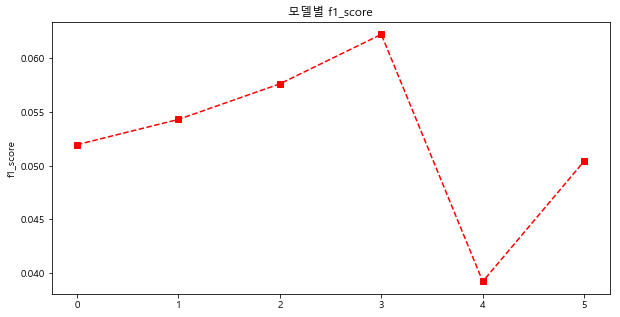

In [177]:
plt.plot(tmp2.values(),'rs--')
plt.rcParams["figure.figsize"] = (4,5)
plt.ylabel('f1_score')
plt.title('모델별 f1_score')

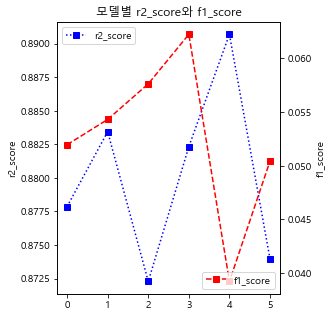

In [178]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title('모델별 r2_score와 f1_score')
ax0.plot(tmp.values(), 'bs:', label="r2_score")
ax0.set_ylabel("r2_score")
ax0.grid(False)
ax1.plot(tmp2.values(), 'rs--', label="f1_score")
ax1.set_ylabel("f1_score")
ax1.grid(False)
ax0.legend(loc='best')
ax1.legend(loc='lower right')
plt.show()

In [179]:
# 변수의 중요도 나타내기
# from xgboost import plot_importance
# %matplotlib inline
# plot_importance(xgb)

In [180]:
# 어떤 변수가 가장 큰 영향을 끼치는지

In [181]:
# onehotencoding을 하지 말고 라벨 인코딩을 이용하여도 실행

In [182]:
from xgboost import plot_importance

In [183]:
%matplotlib inline

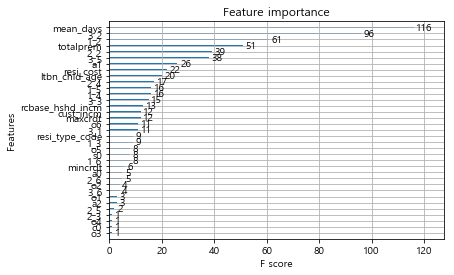

In [184]:
plot_importance(xgb)

In [185]:
# xgboost
# mean_days => 평균 입원 일수가 가장 큰 영향을 차지하였다.
# 이어서 3_2 칼럼이 사기자 구분에 큰 영향을 끼쳤다.

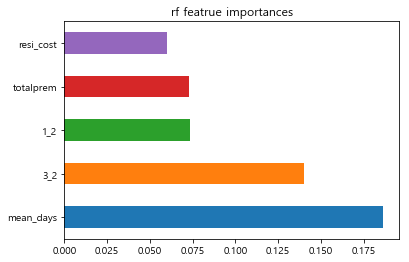

In [186]:
feat_importances = pd.Series(rf.feature_importances_, index=train_x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('rf featrue importances')
plt.show()

Text(0.5, 1.0, 'et feature importances')

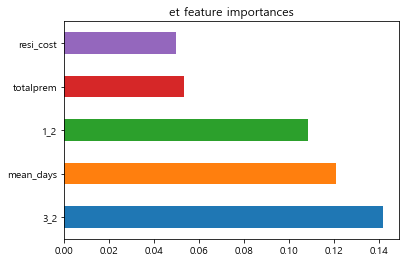

In [187]:
# extratree
# importances = forest.feature_importances_
feat_importance=pd.Series(et.feature_importances_,index=train_x.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.title('et feature importances')

# ※입원 여부, 입원 기간이 사기자 구분할 때 중요한 변수이다.